# Task 1-II : Linear Models
# Analysis of bike sharing demand

**Note**
1. [Must read the data set information.](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)
2. You will understand how to handle the categorical data by doing this task.

In [ ]:
###################
## Run this cell ##
###################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)
print("some rows are lost (specific times like 2am, 3am)")
rides.head()

some rows are lost (specific times like 2am, 3am)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
rides.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

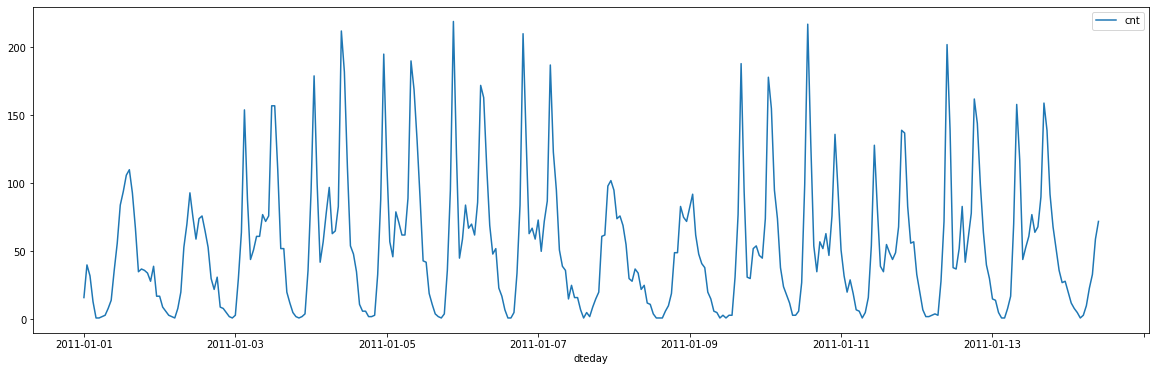

In [ ]:
###################
## Run this cell ##
###################

days = 14
rides[:24*days].plot(x='dteday', y='cnt', figsize=(20,6))
plt.show()

# Q1. Drop these columns in rides (dataframe)

* columns to drop : instant, dteday, atemp, workingday, casual, registered

In [ ]:
####################
## Your code here ##
####################
rides.drop(['instant','dteday','atemp','workingday','casual','registered'],axis=1,inplace=True)
rides

,season,yr,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,1,0.24,0.81,0.0000,16
1,1,0,1,1,0,6,1,0.22,0.80,0.0000,40
2,1,0,1,2,0,6,1,0.22,0.80,0.0000,32
3,1,0,1,3,0,6,1,0.24,0.75,0.0000,13
4,1,0,1,4,0,6,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2,0.26,0.60,0.1642,119
17375,1,1,12,20,0,1,2,0.26,0.60,0.1642,89
17376,1,1,12,21,0,1,1,0.26,0.60,0.1642,90
17377,1,1,12,22,0,1,1,0.26,0.56,0.1343,61


# Q2. Split the df into training set & validation set & test set

1. x : all columns in rides except 'cnt'
2. y : the column 'cnt' in rides
3. variable names :
    * x_train, y_train
    * x_valid, y_valid
    * x_test, y_test
4. split data into training set and test set first
    * test set size = 24 * 21 : last 3 weeks of data
    * you can use an integer argument to parameter 'test_size' for train_test_split
    * **shuffle = False**
5. split training set into training set and validation set
    * validation set size = 24 * 60 : last 60days of training data
    * like splitting data into training & test
5. randomstate : 2021

In [ ]:
###############################################
## Hint code will not be provided, next time ##
###############################################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(rides.drop(['cnt'], axis=1), rides['cnt'],
                                                    test_size=24*21, random_state=2021 ,shuffle=False)

#############################################################
## Split training set into training set and validation set ##
#############################################################
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, 
                                                      test_size=24*60, random_state=2021,shuffle=False)

훈련데이터에서 훈련데이터와 교차검증 데이터를 분리를 해야 합니다.
이 또한 shuffle=False를 지정해야 한다고 생각해서 shuffle=False를 작성하였습니다.

# Q3. Train linear regression model

1. declare your model as lr

In [ ]:
####################
## Your code here ##
####################
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Q4. Make a prediction
1. y_pred_train : prediction on training set
2. y_pred_valid : prediction on validation set
3. y_pred_test : prediction on test set

In [ ]:
####################
## Your code here ##
####################
y_pred_train = lr.predict(x_train)
y_pred_valid = lr.predict(x_valid)
y_pred_test = lr.predict(x_test)

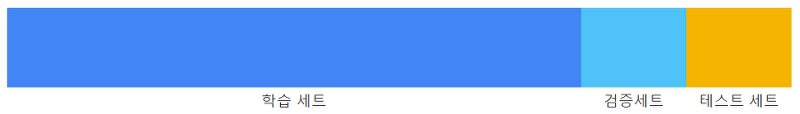

# Q5. Evaluate the model on the training set & validation set

* Use RMSE

In [ ]:
####################
## Your code here ##
####################
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
rmse_valid = np.sqrt(mse_valid)

print("RMSE training set : {:f}".format(rmse_train))
print('RMSE validation test : {:f}'.format(rmse_valid))

RMSE training set : 138.764698
RMSE validation test : 175.705620


# Q6. Analyze the effect of 'hr' (hour)

**assumption1 : every other features are fixed.**<br>
**assumption2 : use training set to anlayze.**
1. How does the 'cnt'(count of thotal rental bikes) change whenever 1 hour has passed ?
2. What is the change in the 'cnt' due to the maximum change of 'hr'
3. How does the effect of 'hr' change when changing from 23 o'clock to 0 o'clock?
4. Is this interpretation appropriate?
    * Write your answer, comparing the time series plot at the top of this file to this interpretation.

In [ ]:
####################
## Your code here ##               
####################
X_data = rides.drop(['cnt'], axis=1)
coef = pd.Series(data=np.round(lr.coef_,3),index=X_data.columns)
coef[3]                                                                         # 6-1번 문제 답

7.718

6-1번 답 : 기본적인 선형회귀계수 값으로는 7.718으로 출력이 되었으나 이는 출근시간, 새벽, 퇴근시간, 등에 따라 달라집니다. 

In [ ]:
m = max(rides["hr"])
n = min(rides['hr'])               
print(coef[3]*(m-n))                                                            # 6-2번 문제 답입니다.

177.514


In [ ]:
coef[3]                                                                         #6-3번 문제 답입니다..........

7.718

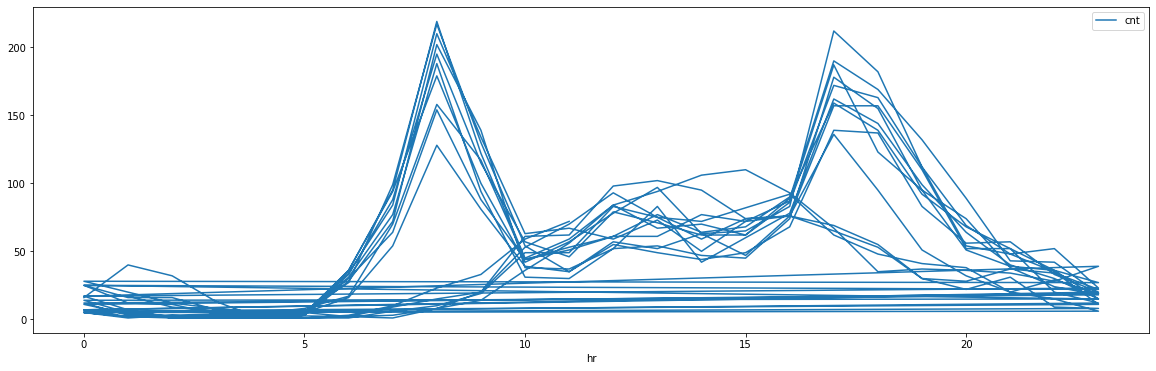

In [ ]:
days = 14
rides[:24*days].plot(x='hr', y='cnt', figsize=(20,6))                           #6-4번 문제 답입니다.
plt.show()

6-4번 답

보시는 것과 같이 cnt 50미만인 부분에서 긴 형태의 직선이 관측됩니다 이 부분이 바로 23~24시로 변화함에 따라 cnt가 바뀌는 부분입니다. 이러한 직선의 기울기를 7.718이라고 할 수 없습니다. 따라서 6-3번의 7.718이라고 작성한 답은 오답이 됩니다.

이러한 숫자형 **범주형** 값을 **더미변수**를 활용하여 **연속형 범주**처럼 분석하도록 하겠습니다.

# Q7. Make dummy variables into rides dataframe

1. Target columns are 'season', 'weathersit', 'mnth', 'hr', 'weekday'
2. Target columns should be dropped in rides dataframe
3. If the number of levels of the 'hr' column is 24, then the number of dummies of 'hr' should be 23

In [ ]:
import pandas as pd

In [ ]:
pd.get_dummies()


In [ ]:
####################
## Your code here ##
####################
rides = pd.get_dummies(rides, columns=['season', 'weathersit', 'mnth', 'hr', 'weekday'])
rides = rides.drop(['hr_23'], axis=1)             #7-3조건에서 hr더미의 수는 23개여야 한다고 해석을 했습니다. 따라서 1개를 빼주었습니다.
rides.head(20)

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0000,16,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0000,40,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0000,32,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0000,13,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0000,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0.24,0.75,0.0896,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0.22,0.80,0.0000,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0.20,0.86,0.0000,3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0.24,0.75,0.0000,8,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0.32,0.76,0.0000,14,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Q8. Split the df(with dummy vars) into training set & validation set & test set

1. x : all columns in rides except 'cnt'
2. y : the column 'cnt' in rides
3. variable names :
    * x_train_d, y_train_d ( actually, y_train_d = y_train )
    * x_valid_d, y_valid_d ( actually, y_valid_d = y_valid )
    * x_test_d, y_test_d ( actually, y_test_d = y_test )
4. split data into training set and test set first
    * test set size = 24 * 21 : last 3 weeks of data
    * you can use an integer argument to parameter 'test_size' for train_test_split
    * **shuffle = False**
5. split training set into training set and validation set
    * validation set size = 24 * 60 : last 60days of training data
    * like splitting data into training & test
5. randomstate : 2021

In [ ]:
###############################################
## Hint code will not be provided, next time ##
###############################################
from sklearn.model_selection import train_test_split

x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(rides.drop(['cnt'], axis=1), rides['cnt'],
                                                    test_size=24*21, random_state=2021 , shuffle=False)

#############################################################
## Split training set into training set and validation set ##
#############################################################
x_train_d, x_valid_d, y_train_d, y_valid_d = train_test_split(x_train_d, y_train_d,
                                                              test_size=24*60, random_state=2021, shuffle=False)

# Q9. Train linear regression model on training set with dummy variables

1. declare your model as lr_d

In [ ]:
####################
## Your code here ##
####################
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_d, y_train_d)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Q10. Make a prediction
1. y_pred_train_d : prediction on training set
2. y_pred_valid_d : prediction on validation set
3. y_pred_test_d : prediction on test set

In [ ]:
####################
## Your code here ##
####################
y_pred_train_d = lr.predict(x_train_d)
y_pred_valid_d = lr.predict(x_valid_d)
y_pred_test_d = lr.predict(x_test_d)

# Q11. Evaluate the model(lr_d) on the training set & validation set which have dummy variables

* Use RMSE
* Question : Describe the change of error, comparing the result of Q5 to the result of Q11

In [ ]:
####################
## Your code here ##
####################
from sklearn.metrics import mean_squared_error

mse_train_d = mean_squared_error(y_train_d, y_pred_train_d)
rmse_train_d = np.sqrt(mse_train_d)
mse_valid_d = mean_squared_error(y_valid_d, y_pred_valid_d)
rmse_valid_d = np.sqrt(mse_valid_d)

print("RMSE training set : {:f}".format(rmse_train_d))
print('RMSE validation test : {:f}'.format(rmse_valid_d))

RMSE training set : 99.555851
RMSE validation test : 123.464651


# Q11. Evaluate the model(lr_d) on the test set which have dummy variables

* Use RMSE

In [ ]:
####################
## Your code here ##
####################
from sklearn.metrics import mean_squared_error

mse_test_d = mean_squared_error(y_test_d, y_pred_test_d)
rmse_test_d = np.sqrt(mse_test_d)

print("RMSE test set : {:f}".format(rmse_test_d))

RMSE test set : 108.959568


error 감소 : 숫자형 범주형 값(hr)을 선형 회귀에 사용하는 경우 회귀 계수를 연산하는 과정에서 영향을 크게 미쳐서 선형회귀에서는 원핫인코딩을 하는 방법을 알 게 되었습니다.

# Q12. Analyze the effect of dummy variables of 'hr'

**assumption1 : every other features are fixed.**<br>
**assumption2 : use training set to anlayze.**

1. Print all the effects that each time(0~23) has on the 'cnt'
    * example
```
     hr_0 : 29
     hr_1 : 11
     ~
     hr_23 : -2
```
2. write your interpretation of the result by referring to
    * the time series plot at the top
    * the results of Q5, Q11
    * the interpretation of Q6

In [ ]:
## the names of columns
x_train_d.columns[22:45]

Index(['mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19'],
      dtype='object')

In [ ]:
####################
## Your code here ##
####################
x_train_d.columns[25:48]

Index(['hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16',
       'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22'],
      dtype='object')

In [ ]:
for i in range(0,23):
  print(f"hr_{i} : {lr.coef_[i+25]:f}")           # 12-1번 답

hr_0 : -32.827402
hr_1 : -50.619444
hr_2 : -58.888875
hr_3 : -69.851114
hr_4 : -73.150842
hr_5 : -56.879268
hr_6 : 2.967039
hr_7 : 133.733912
hr_8 : 265.125000
hr_9 : 124.156250
hr_10 : 73.500000
hr_11 : 99.746094
hr_12 : 132.875000
hr_13 : 128.250000
hr_14 : 118.968750
hr_15 : 127.406250
hr_16 : 185.976562
hr_17 : 341.023438
hr_18 : 309.132812
hr_19 : 207.125000
hr_20 : 125.078125
hr_21 : 78.250000
hr_22 : 41.687500


12-2번 답 

조건1 : 저희는 시계열 데이터를 다루고 있습니다

조건2 : Q5의 경우는 더미를 사용하지 않은 즉, 숫자 범주형 값을 선형회귀에 사용했고 Q11의 경우는 더미를 사용한 즉, 숫자 범주형값을 연속 범주형 값으로 만들었습니다. 그 결과 예측성능이 상승한 것을 확인했습니다.

조건3: Q6을 통해 숫자형 범주형 값을 선형 회귀에 사용하는 경우 회귀 계수를 연산하는 과정에서 영향을 크게 미쳐서 선형회귀에서는 원핫인코딩을 하는 방법을 알 게 되었습니다.



## 저의 최종적인 결론

###**선형회귀 수행을 하는 경우 특징을 어떻게 인코딩하는 지에 따라 성능에 영향을 크게 줄수 있습니다.**

###**더미로 원핫 인코딩을 한 결과 7-8시(출근시간), 16-19(퇴근시간)에 자전거를 많이 이용한다는 결론을 내렸습니다.** -회귀계수 133 이상
기회가 되는 경우 더 나아가 Q7 에서 TA님께서 알려주신 'season', 'weathersit', 'mnth', 'hr', 'weekday'의 더미 특징들도 분석해보겠습니다. 